In [1]:
# matplotlib homnework

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics as sts
import seaborn as sn 

# Study data files
mouse_metadata_path = "/Users/rodneydavermann/Desktop/Matplotlib_Challenge/data/Mouse_data.csv"
study_results_path = "/Users/rodneydavermann/Desktop/Matplotlib_Challenge/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data_combine = pd.merge(mouse_metadata,study_results,how="inner", on = "Mouse ID")

# Display the data table for preview
mouse_study_data_combine

# Checking the number of mice.
mice_number = len(mouse_study_data_combine["Mouse ID"])
mice_number


1893

In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate_ID_Timepoint = mouse_study_data_combine[mouse_study_data_combine.duplicated(["Mouse ID", "Timepoint"])]
mice_duplicate_ID_Timepoint

# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_ID = mouse_study_data_combine[mouse_study_data_combine.duplicated(["Mouse ID",])]
mice_duplicate_ID       

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
tiny_mouse_study_data = mouse_study_data_combine.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
tiny_mouse_study_data

# Checking the number of mice in the clean DataFrame.
new_mice_number = len(tiny_mouse_study_data["Mouse ID"])
new_mice_number

1888

In [3]:
#Summary Statistics

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume  with the raw data
summary_statistics_describe = tiny_mouse_study_data["Tumor Volume (mm3)"].describe() 
summary_statistics_describe


count    1888.000000
mean       50.449276
std         8.904565
min        22.050126
25%        45.000000
50%        48.951421
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [4]:
#Summary Statistics

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_volume_average = tiny_mouse_study_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
tumor_volume_median = tiny_mouse_study_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
tumor_volume_variance = tiny_mouse_study_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
tumor_volume_standard = tiny_mouse_study_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
tumor_volume_sem = tiny_mouse_study_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

summary_statistics_groupby = pd.DataFrame({"Mean":tumor_volume_average , "Median": tumor_volume_median,
                                            "Variance": tumor_volume_variance, 
                                            "Standard Deviation": tumor_volume_standard, "SEM": tumor_volume_sem})

summary_statistics_groupby

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [5]:
#Summary Statistics

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_summary_aggregate = tiny_mouse_study_data.agg({"Tumor Volume (mm3)": ["mean", "median", "std", "sem"]})
tumor_volume_summary_aggregate

,Tumor Volume (mm3)
mean,50.449276
median,48.951421
std,8.904565
sem,0.204933


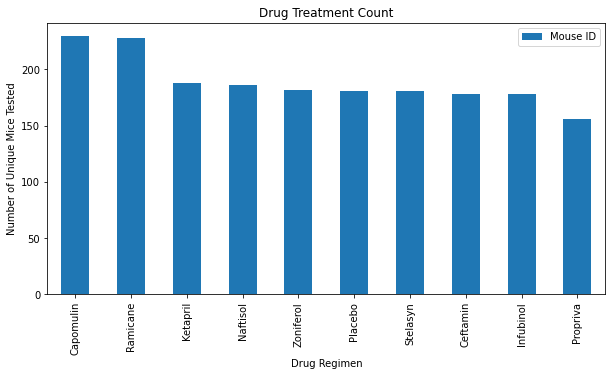

<Figure size 432x288 with 0 Axes>

In [6]:
 #Bar and Pie Charts
    
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
barplot_data = pd.DataFrame(tiny_mouse_study_data.groupby(["Drug Regimen"]).count()).reset_index()
barplot_data = barplot_data.sort_values(by="Mouse ID", ascending=False) 
barplot_data = barplot_data[["Drug Regimen", "Mouse ID"]]
barplot_data = barplot_data.set_index("Drug Regimen")
barplot_data.plot(kind="bar", figsize=(10,5))
plt.title("Drug Treatment Count")
plt.ylabel("Number of Unique Mice Tested")
plt.show()
plt.tight_layout()

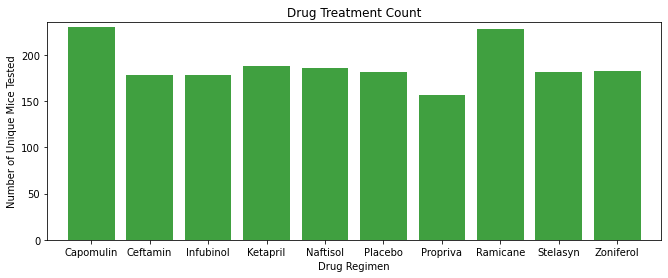

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# convert the index column of the summary statistics groupby as a list of type of drug regimen
drug_regimen = summary_statistics_groupby.index.tolist()

# count the number of drug 
drug_regimen_count = (tiny_mouse_study_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

# bar plot with pyplot
plt.figure(figsize=(11,4))
x_axis = np.arange(0, len(drug_regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

plt.xlim(-0.75, len(drug_regimen)-.25)
plt.ylim(0, max(drug_regimen_count) + 5)

plt.bar(x_axis, drug_regimen_count, facecolor="green", alpha=0.75, align="center")
plt.xticks(tick_locations, drug_regimen)
plt.show()

Text(0, 0.5, 'Sex')

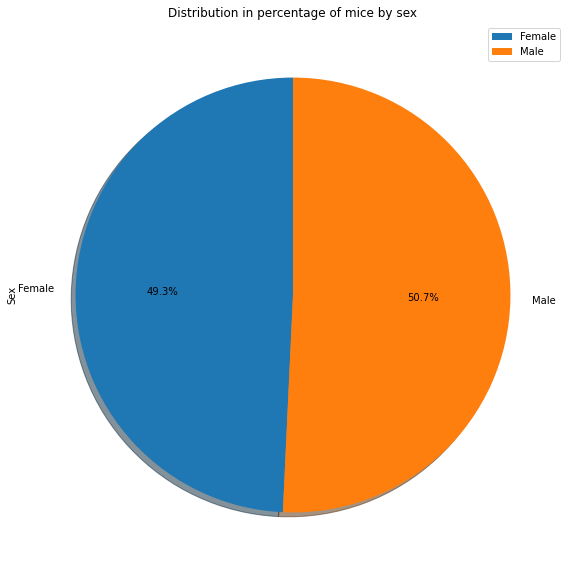

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# determine the total number of male and female mice 
pie_chart_data = (tiny_mouse_study_data.groupby(["Sex"]).count()).reset_index()

# select the two first rows, and the two first columns from the pie_chart_data
pie_chart_data_gender = pie_chart_data.loc[0:1, "Sex":"Mouse ID"] 

# pie plot with pandas
pie_chart_data_gender.groupby(["Sex"]).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
plt.title("Distribution in percentage of mice by sex")
plt.ylabel("Sex")

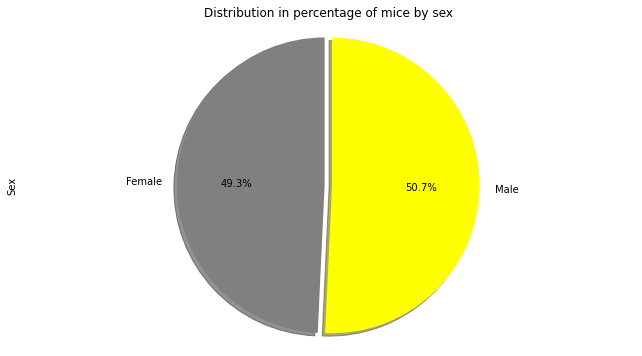

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# data for pie chart with pyplot
sex_labels = ["Female", "Male"]
count_sex = (tiny_mouse_study_data.groupby(["Sex"])["Age_months"].count()).tolist()
count_sex
colors = ["gray", "yellow"]
explode = (0, 0.05)
plt.figure(figsize=(11,6))
plt.title("Distribution in percentage of mice by sex")
plt.ylabel("Sex")
plt.pie(count_sex, explode=explode, labels= sex_labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [10]:
# quartiles, outliers and boxplots

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics as sts
import seaborn as sn 

# Study data files
mouse_metadata_path = "/Users/rodneydavermann/Desktop/Matplotlib_Challenge/data/Mouse_data.csv"
study_results_path = "/Users/rodneydavermann/Desktop/Matplotlib_Challenge/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data_combine = pd.merge(mouse_metadata,study_results,how="inner", on = "Mouse ID")

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
tiny_mouse_study_data = mouse_study_data_combine.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
tiny_mouse_study_data


# Start by getting the last (greatest) timepoint for each mouse
tiny_mouse_study_data_sorted = tiny_mouse_study_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_timepoint = tiny_mouse_study_data_sorted.loc[tiny_mouse_study_data_sorted["Timepoint"] == 45]
last_timepoint.head().reset_index()


# Capomulin data
capomulin = last_timepoint[last_timepoint["Drug Regimen"].isin(["Capomulin"])]
capomulin.head().reset_index()
capomulin_data = capomulin.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capomulin_data = capomulin_data["Tumor Volume (mm3)"]
capomulin_data

# calculate quartile for capomulin drug 
capomulin_quartiles = capomulin_data.quantile([.25,.5,.75])
lower_quartile = capomulin_quartiles[0.25]
upper_quartile = capomulin_quartiles[0.75]
interval_inter_quartile = upper_quartile - lower_quartile

print(f"The lower quartile of temperatures is: {lower_quartile}")
print(f"The upper quartile of temperatures is: {upper_quartile}")
print(f"The interquartile range of temperatures is: {interval_inter_quartile}")
print(f"The median of temperatures is: {capomulin_quartiles[0.5]}")

capomulin_lower_bound = lower_quartile - (1.5*interval_inter_quartile)
capomulin_upper_bound = upper_quartile + (1.5*interval_inter_quartile)
print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


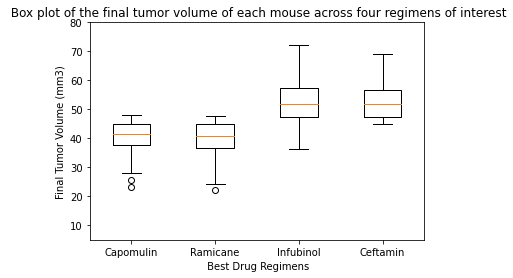

In [11]:
# box plot for drug regimen

# Drug with better result
drug = tiny_mouse_study_data[tiny_mouse_study_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
drug = drug.sort_values(["Timepoint"], ascending=True)

# create a new data frame with Drug Regimen, Mouse ID, Timepoint, and Tumor Volume (mm3)
drug_data = drug[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
drug_data


# creating box plot with Capomulin, Ramicane, Infubinol, and Ceftamin drugs

# mice by Regimen and ID 
mice_regimens_ID_sort = drug_data.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
mice_regimens_ID_sort.head()

# new data frame 
mice_regimens_ID_sort = mice_regimens_ID_sort.to_frame()
mice_regimens_ID_sort

# list of drugs
drugs_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# create a box plot for all the drugs selected
boxplot_data = mice_regimens_ID_sort.reset_index()
tumor_lists = tiny_mouse_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(drugs_list)
tumor_vols = [vol for vol in tumor_list_df["Tumor Volume (mm3)"]]
plt.boxplot(tumor_vols, labels=drugs_list)
plt.ylim(5, 80)
plt.title(" Box plot of the final tumor volume of each mouse across four regimens of interest")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel(" Best Drug Regimens")
plt.show()

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

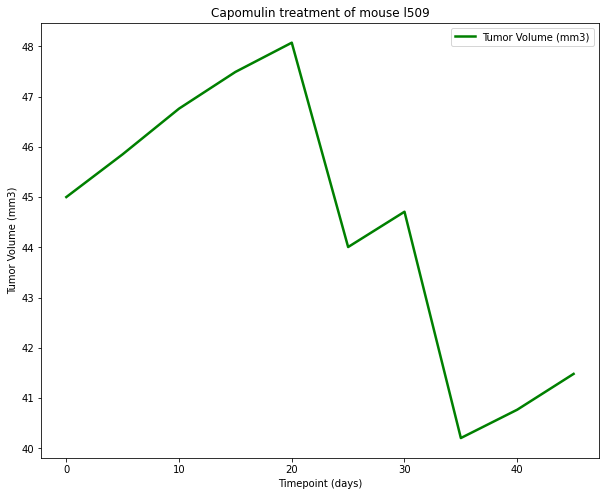

In [12]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# extract capomulin data from tiny_mouse_study_data dataframe 
capomulin_data = tiny_mouse_study_data.loc[tiny_mouse_study_data["Drug Regimen"] == "Capomulin"]
capomulin_data = capomulin_data.reset_index()

# select all columns data for a specific mouse  
capo_data1 = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509"]
capo_data1

# select the two interested columns Timepoint and Tumor Volume (mm3)
capo_data1 = capo_data1.loc[:, ["Tumor Volume (mm3)", "Timepoint"]]

# reset the index and create the line plot showing 
capo_data1 = capo_data1.reset_index(drop=True)
capo_data1.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="green")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of mouse l509")

Text(0.5, 1.0, 'scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen')

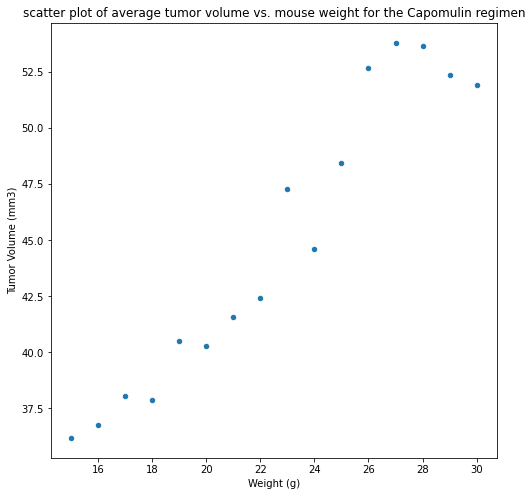

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# scatter plot data
scatter_data = tiny_mouse_study_data[tiny_mouse_study_data["Drug Regimen"].isin(["Capomulin"])]

# scatter data dataframe
scatter_dataframe = drug[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

# scatter_dataframe Sorted  by Weight (g) 
scatter_dataframe = scatter_dataframe.sort_values(["Weight (g)"], ascending=True)
scatter_dataframe

# Resharpe scatter_dataframe 
scatter_dataframe_index = scatter_dataframe.reset_index()
scatter_dataframe_index

# aggregating scatter_dataframe with mean function from a groupby of Weight and Tumor Volume
scatter_dataframe_group = scatter_dataframe_index.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
scatter_dataframe_group
capo_grouped_plot = pd.DataFrame(scatter_dataframe_group).reset_index()
capo_grouped_plot

# scatter plot 
scatter_dataframe = capo_grouped_plot.plot(kind="scatter", x="Weight (g)", y= "Tumor Volume (mm3)", grid = False, figsize= (8,8))
plt.title("scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen")

Text(0.5, 1.0, 'Weight Vs. Avg Tumor Vol')

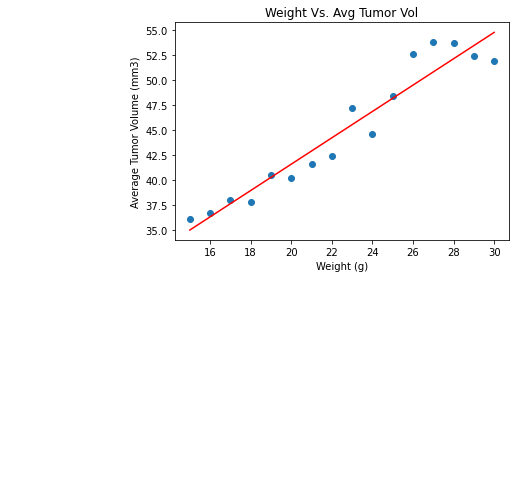

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# determine the input and the outcome variables 
input_value = capo_grouped_plot["Weight (g)"]
outcome_value = capo_grouped_plot["Tumor Volume (mm3)"]

# linear regression formula
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(input_value, outcome_value)

# equation of the regression 
regress_equation = input_value * slope + intercept

#  line equation
regress_line = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#PLotting the Scatter
plt.scatter(input_value, outcome_value)

#PLotting the line
plt.plot(input_value,regress_equation,"r-")

#making the line red
plt.annotate(regress_line,(6,10),fontsize=10,color="red")

#Titles and Labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Vs. Avg Tumor Vol")